In [1]:
import pandas as pd
import numpy as np
from skimpy import skim

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import matplotlib as mlp

sns.set_theme(style='darkgrid', palette='mako')

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 15

# LOADING DATA

In [3]:
cargotype_info = pd.read_csv('data/cargotype_info.csv', index_col='Unnamed: 0')
carton_price = pd.read_excel('data/carton_price.xlsx')
carton = pd.read_csv('data/carton.csv')
data = pd.read_csv('data/data.csv', index_col='Unnamed: 0')
sku_cargotypes = pd.read_csv('data/sku_cargotypes.csv', index_col='Unnamed: 0')
sku = pd.read_csv('data/sku.csv', index_col='Unnamed: 0')

In [4]:
def view_func(data):
    display(data)
    skim(data)
    print('DUPLICATES')
    print(data.duplicated().sum())

## CARGOTYPE_INFO

In [5]:
view_func(cargotype_info)

,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...
...,...,...
93,640.0,электроника
94,908.0,ветеринарная аптека
95,1300.0,большой аксессуар
96,1200.0,малый аксессуар


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98     │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     2 │        2 │      550 │    310 │     0 │    300 │    770 │    1300 │  ▆███▆▁   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ description               │       0 │          0 │                          2.4 │                      240 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
1


In [6]:
cargotype_info = cargotype_info.dropna().reset_index(drop=True)

## CARTON_PRICE

In [7]:
view_func(carton_price)

,Unnamed: 0,01.03.2023
0,MYA,1.109861
1,MYB,2.297432
2,MYC,3.616713
3,MYD,6.918375
4,MYE,8.062722
5,MYF,4.083130
6,YMA,4.392937
7,YMC,7.777487
8,YME,23.670260
9,YMF,10.661487


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ 01.03.2023          │     0 │        0 │       14 │    13 │    1.1 │    4.2 │     21 │      41 │  █▅▁▁▁▃   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴───────┴────────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 0                │       0 │          0 │                            1 │                       15 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [8]:
carton_price.columns = ['cartontype', 'price']

## CARTON

In [9]:
view_func(carton)

,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
0,YMA,24.7,15.0,10.00,1
1,YMC,30.0,20.0,15.00,1
2,YME,30.0,30.0,44.50,1
3,YMF,35.0,25.0,15.00,1
4,YMG,44.7,30.0,20.00,1
5,YMH,42.0,20.0,86.00,0
6,YMJ,50.0,29.0,48.00,0
7,KSD,0.0,0.0,0.00,0
8,YML,60.0,40.0,45.00,1
9,YMN,60.0,60.0,40.00,0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 29     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ LENGTH                │     0 │       0 │      40 │      23 │    0 │     27 │     52 │      90 │  ▂▃█▁▃▁   │  │
│ │ WIDTH                 │     0 │       0 │      30 │      18 │    0 │     20 │     40 │      63 │  ▃██▃▂▅   │  │
│ │ HEIGHT                │     0 │       0 │      27 │      26 │    0 │      5 │     45 │      86 │  █▄▁▃▂▁   │  │
│ │ DISPLAYRFPACK         │     0 │       0 │    0.62 │    0.49 │    0 │      0 │      1 │       1 │  ▅    █   │  │
│ └───────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CARTONTYPE                │       0 │          0 │                            1 │                       29 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [10]:
carton.columns = [s.lower() for s in carton.columns]

## DATA

In [11]:
view_func(data)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325618,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325619,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325620,7,e71d2e750ce9a7a39c273c634be1665d,YMC,1,YMC,YMC,8525,YMC,3523,8525,0.284,9db21acf9e6c1a66493c246c1461f989,be7c9ad8b9430d358e6c276b94e2beff,58054d533ef06746ffd8cf99fad4a8cb
325621,7,2e2a642f611b5a6f2c404ab945fbc2a3,MYB,1,YMU,MYB,2816,YMU,552,2592,0.230,4aedb72c5662562524f6119918c7179b,be7c9ad8b9430d358e6c276b94e2beff,1666b5c878be124f05fb9a1d95dd8a68


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 325623 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p75     ┃ p100       ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ whs                 │    0 │      0 │      1.4 │      2.1 │    0 │      0 │       3 │          7 │ █▁▁▁ ▁  │  │
│ │ box_num             │    0 │      0 │      2.8 │       16 │    1 │      1 │       1 │        240 │    █    │  │
│ │ sel_calc_cube       │    0 │      0 │    11000 │    14000 │    0 │   3400 │   16000 │     110000 │   █▂    │  │
│ │ pack_volume         │    0 │      0 │     5400 │    29000 │    0 │    500 │    3200 │    1800000 │    █    │  │
│ │ rec_calc_cube       │    0 │      0 │    18000 │    27000 │    0 │   3400 │   18000 │     110000 │ █▂▁  ▁  │  │
│ │ goods_wght          │    0 │      0 │      1.1 │      4.1 │    0 │   0.11 │     0.8 │        150 │    █    │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴──────┴────────┴─────────┴────────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ orderkey                              │     0 │         0 │                        1 │              330000 │  │
│ │ selected_cartontype                   │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_cartonty                  │     0 │         0 │                        1 │              330000 │  │
│ │ selected_carton                       │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_carton                    │     0 │         0 │                        1 │              330000 │  │
│ │ sku                                   │     0 │         0 │                        1 │              330000 │  │
│ │ who                                   │     0 │         0 │                        1 │              330000 │  │
│ │ trackingid                            │     0 │         0 │                        1 │              330000 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
91795


## SKU_CARGOTYPES

In [12]:
view_func(sku_cargotypes)

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290
...,...,...
21053147,5786e5c2309967c64b10e443ce1a807c,691
21053148,859788a147004b9a1d24a8168460f79a,200
21053149,859788a147004b9a1d24a8168460f79a,290
21053150,859788a147004b9a1d24a8168460f79a,310


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 21053152 │ │ string      │ 1     │                                                        │
│ │ Number of columns │ 2        │ │ int64       │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     0 │        0 │      530 │    260 │     0 │    290 │    690 │    1300 │   ▁█▅▃▄   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                 21000000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


## SKU

In [13]:
view_func(sku)

,sku,a,b,c
0,8ba57dcdba9a58b0c4edd180bef6afc9,11.0,31.0,28.0
1,d9af6ce6f9e303f4b1a8cb47cde21975,29.0,14.0,40.0
2,8b91fd242bde88f0891380506d9c3caa,12.0,13.0,35.0
3,e8af308a7659e34194770d1e3a48e144,3.0,13.0,8.0
4,dc0e2542e122731217289b8e6d3bd3f8,96.0,18.0,56.0
...,...,...,...,...
6385956,5367045e88650a12cde4803f55ed7525,0.0,0.0,0.0
6385957,8a3dcb8f1ccce02a3df63a9db0903f38,0.0,0.0,0.0
6385958,31e5069a999cd927bd623fd699957630,0.0,0.0,0.0
6385959,888059750dcd75922faf3b60144e4def,0.0,0.0,0.0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6385961 │ │ float64     │ 3     │                                                         │
│ │ Number of columns │ 4       │ │ string      │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ a                    │     0 │        0 │       21 │    19 │     0 │     10 │     28 │    6600 │     █     │  │
│ │ b                    │     0 │        0 │       12 │    15 │     0 │      3 │     16 │    2000 │     █     │  │
│ │ c                    │     0 │        0 │       18 │    15 │     0 │      8 │     24 │     590 │     █     │  │
│ └──────────────────────┴───────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                  6400000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


# EDA

### Сделаем группу с SKU и марками типов товара

In [14]:
sku_groups = sku_cargotypes.groupby('sku')['cargotype'].apply(list).reset_index()

In [15]:
sku_groups.head()

,sku,cargotype
0,0000060b72e5a5d67ee3c37ceab6b72a,"[290, 671, 950]"
1,00000c9eb5ba2364380ab2e3bf870c23,"[290, 440, 441, 460, 480, 690]"
2,000010b2dda4921d4982818e241847bf,"[290, 440, 441, 480, 490, 690]"
3,00001196fe633174323cb69c4ad05ecb,[290]
4,000015d94c63b8dbac214ad23bb8bb20,"[200, 290, 310]"


### Создание датасета для обучения

Добавим объем упаковки и объем товара

In [16]:
carton['vol'] = carton[['length', 'width', 'height']].prod(axis=1)
sku['vol'] = np.floor(sku[['a', 'b', 'c']].prod(axis=1))

In [189]:
df = data.copy()

Дропнем колонки

In [190]:
cols_to_drop = ['who', # Лишняя информация
                'trackingid', # Лишняя информация для обучения
                #'recommended_cartontype', # Работа прошлого алгоритма - для обучения лишняя инфа
                'recommended_carton', # Дубликат
                'selected_cartontype', # Дубликат 
                'rec_calc_cube', # Результат предсказания
                #'orderkey', 
                'whs' # Не влияет на задачу
                ]

In [191]:
df = df.drop(cols_to_drop, axis=1)

df.head()

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
1,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
2,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
3,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
4,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd


In [192]:
df.duplicated().sum()

91798

In [193]:
df = df.drop_duplicates().reset_index(drop=True)

df.shape

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,MYD,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b
2,3e646181f6f708edd3326c1626c12d23,1,YMG,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2
3,7047c16a6b7c120162ca3da0ebca43fd,1,MYE,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c
4,097917e584151c0c21f205b2c3aafa10,1,YMF,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e
...,...,...,...,...,...,...,...,...
233820,8ed0af8473526c54b4b2f99f0060c3ea,1,YML,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30
233821,0e4f34db53e37d6bf171c2e055e2b4e0,1,YMC,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e
233822,e71d2e750ce9a7a39c273c634be1665d,1,YMC,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989
233823,2e2a642f611b5a6f2c404ab945fbc2a3,1,YMU,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b


Добавим ОБЪЕМ ТОВАРА

In [194]:
df = pd.merge(df, sku[['vol', 'sku']], on='sku', how='left')

df = df.rename(columns={'vol':'sku_vol'})

df.head()

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_vol
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,2046.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,MYD,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,3050.0
2,3e646181f6f708edd3326c1626c12d23,1,YMG,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,15180.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,MYE,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,6561.0
4,097917e584151c0c21f205b2c3aafa10,1,YMF,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,6346.0
...,...,...,...,...,...,...,...,...,...
233820,8ed0af8473526c54b4b2f99f0060c3ea,1,YML,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,25168.0
233821,0e4f34db53e37d6bf171c2e055e2b4e0,1,YMC,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,2080.0
233822,e71d2e750ce9a7a39c273c634be1665d,1,YMC,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,3523.0
233823,2e2a642f611b5a6f2c404ab945fbc2a3,1,YMU,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,552.0


Посчитаем кол-во товаров в заказе

In [195]:
items = df.groupby('orderkey')['sku'].count().reset_index()

items.columns = ['orderkey', 'items']

items

,orderkey,items
0,00004fc4755eeb7e851e52ec91130fe4,1
1,00008e765c2d85abfa9c97563afd98ef,1
2,0000c268eb1be1dd5b8c1a032f7318fc,1
3,0000fc4c7acac6e89f82392b90e47a27,2
4,0001963724fa4cc12d4f025056085633,2
...,...,...
159894,fffe13683b35336a4c1bb061f479f05b,1
159895,ffff1e5d7f5b52f28d733ba01a4589b9,1
159896,ffff1f0a51126b373f36d7733a5ddb0f,1
159897,ffff748210310fffe23e3ade55d26401,1


Добавим КОЛ-ВО ТОВАРОВ В ЗАКАЗЕ

In [196]:
df = pd.merge(df, items, on='orderkey', how='left')

df

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_vol,items
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,2046.0,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,MYD,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,3050.0,1
2,3e646181f6f708edd3326c1626c12d23,1,YMG,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,15180.0,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,MYE,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,6561.0,1
4,097917e584151c0c21f205b2c3aafa10,1,YMF,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,6346.0,1
...,...,...,...,...,...,...,...,...,...,...
233820,8ed0af8473526c54b4b2f99f0060c3ea,1,YML,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,25168.0,1
233821,0e4f34db53e37d6bf171c2e055e2b4e0,1,YMC,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,2080.0,1
233822,e71d2e750ce9a7a39c273c634be1665d,1,YMC,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,3523.0,1
233823,2e2a642f611b5a6f2c404ab945fbc2a3,1,YMU,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,552.0,1


In [197]:
df = df.dropna().reset_index(drop=True)

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_vol,items
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,2046.0,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,MYD,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,3050.0,1
2,3e646181f6f708edd3326c1626c12d23,1,YMG,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,15180.0,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,MYE,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,6561.0,1
4,097917e584151c0c21f205b2c3aafa10,1,YMF,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,6346.0,1
...,...,...,...,...,...,...,...,...,...,...
224318,8ed0af8473526c54b4b2f99f0060c3ea,1,YML,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,25168.0,1
224319,0e4f34db53e37d6bf171c2e055e2b4e0,1,YMC,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,2080.0,1
224320,e71d2e750ce9a7a39c273c634be1665d,1,YMC,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,3523.0,1
224321,2e2a642f611b5a6f2c404ab945fbc2a3,1,YMU,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,552.0,1


# ГРАФИКИ

In [198]:
df.describe()

,box_num,sel_calc_cube,pack_volume,goods_wght,sku_vol,items
count,224323.000000,224323.000000,2.243230e+05,224323.000000,2.243230e+05,224323.000000
mean,1.407306,9297.549315,4.641132e+03,1.056706,4.601537e+03,3.556278
std,6.477231,10860.230212,1.500008e+04,2.703741,1.485825e+04,20.042871
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,1.000000,3449.000000,5.000000e+02,0.120000,5.000000e+02,1.000000
50%,1.000000,8436.000000,1.260000e+03,0.310000,1.273000e+03,1.000000
75%,1.000000,13500.000000,3.696000e+03,0.856000,3.672000e+03,3.000000
max,235.000000,108000.000000,1.815450e+06,88.000000,1.680000e+06,436.000000


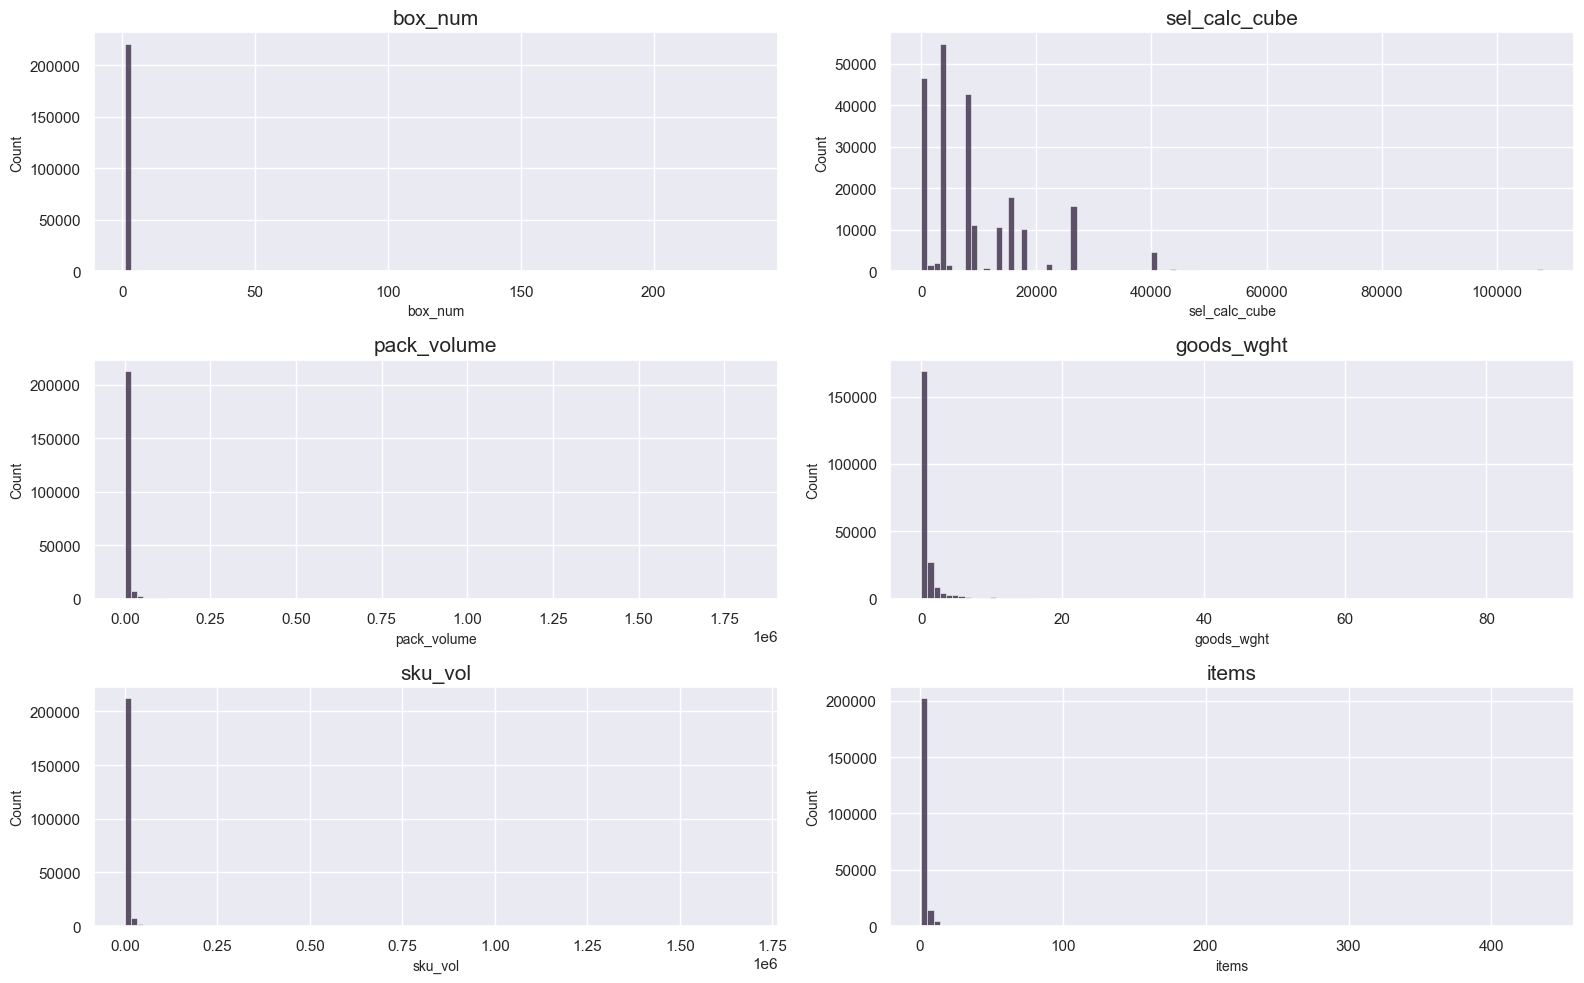

In [199]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(3, 2, figsize=(16, 10))

axs = axs.ravel()

for i in range(6):
    sns.histplot(df_numeric[df_numeric.columns[i]], bins=100, ax=axs[i])
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

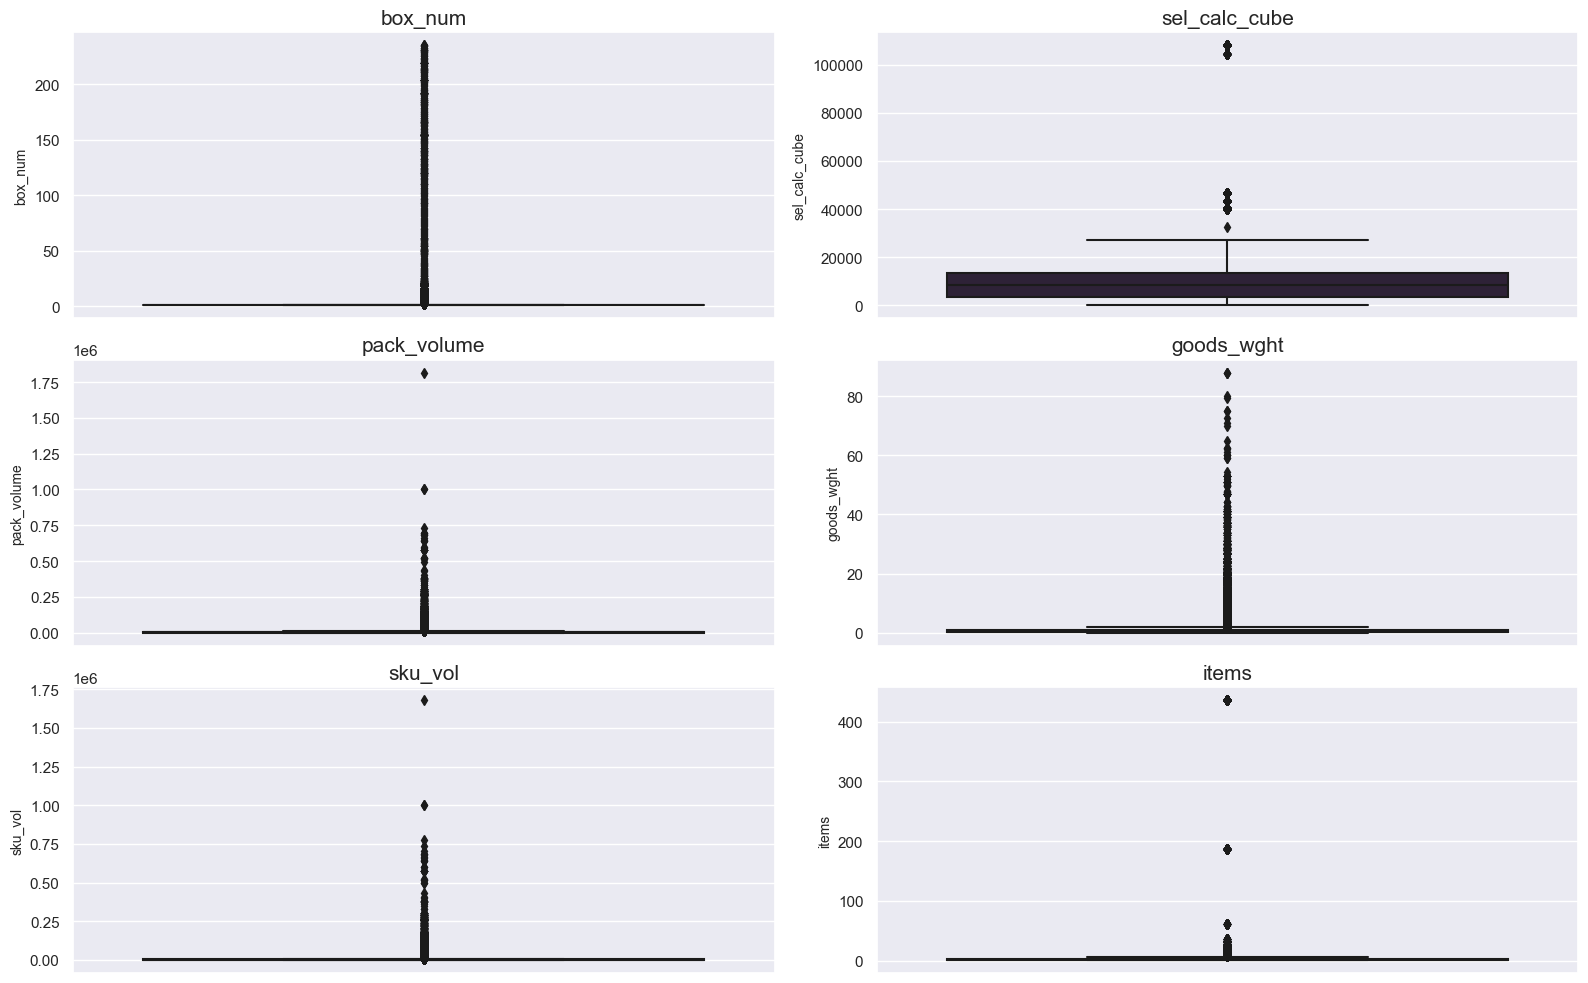

In [200]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))

axs = axs.ravel()

for i in range(6):
    sns.boxplot(y=df_numeric[df_numeric.columns[i]], ax=axs[i])  
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

In [201]:
def quantile_cut(data, col):
    low = data[col].quantile(0.001)
    high = data[col].quantile(0.999)

    data = data[(data[col]>low)&(data[col]<high)]

    return data

In [202]:
tt = df.copy()

In [203]:
for col in df_numeric.columns:
    tt = quantile_cut(tt, col)

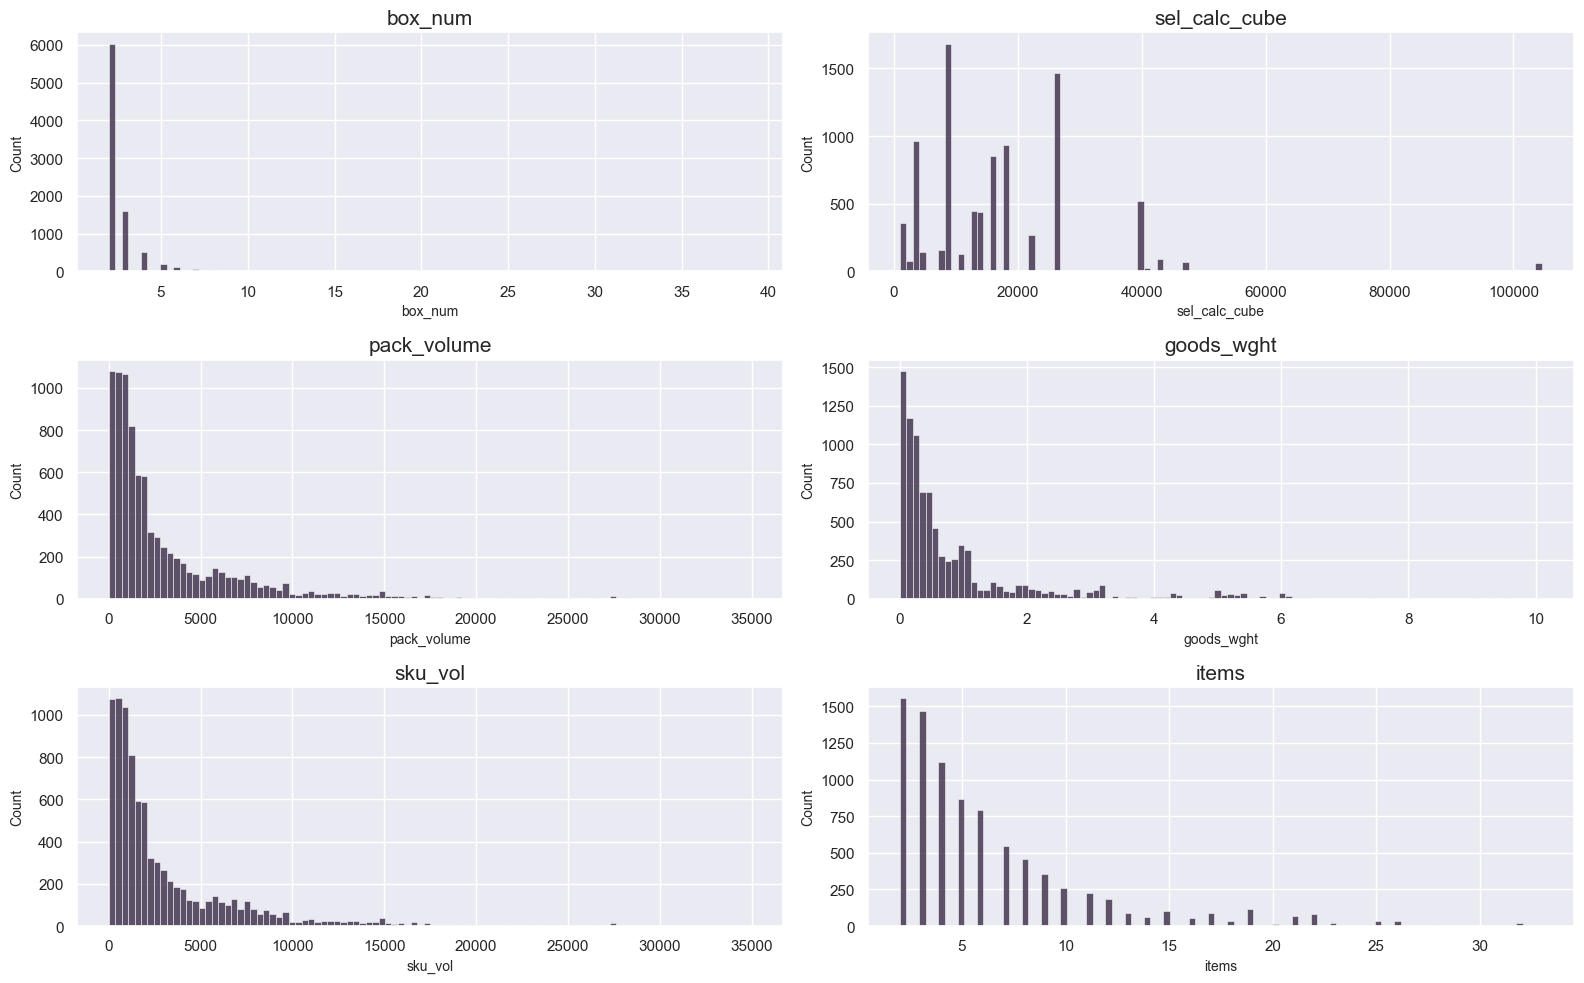

In [204]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))  

axs = axs.ravel()

for i in range(6):
    sns.histplot(tt[df_numeric.columns[i]], bins=100, ax=axs[i]) 
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

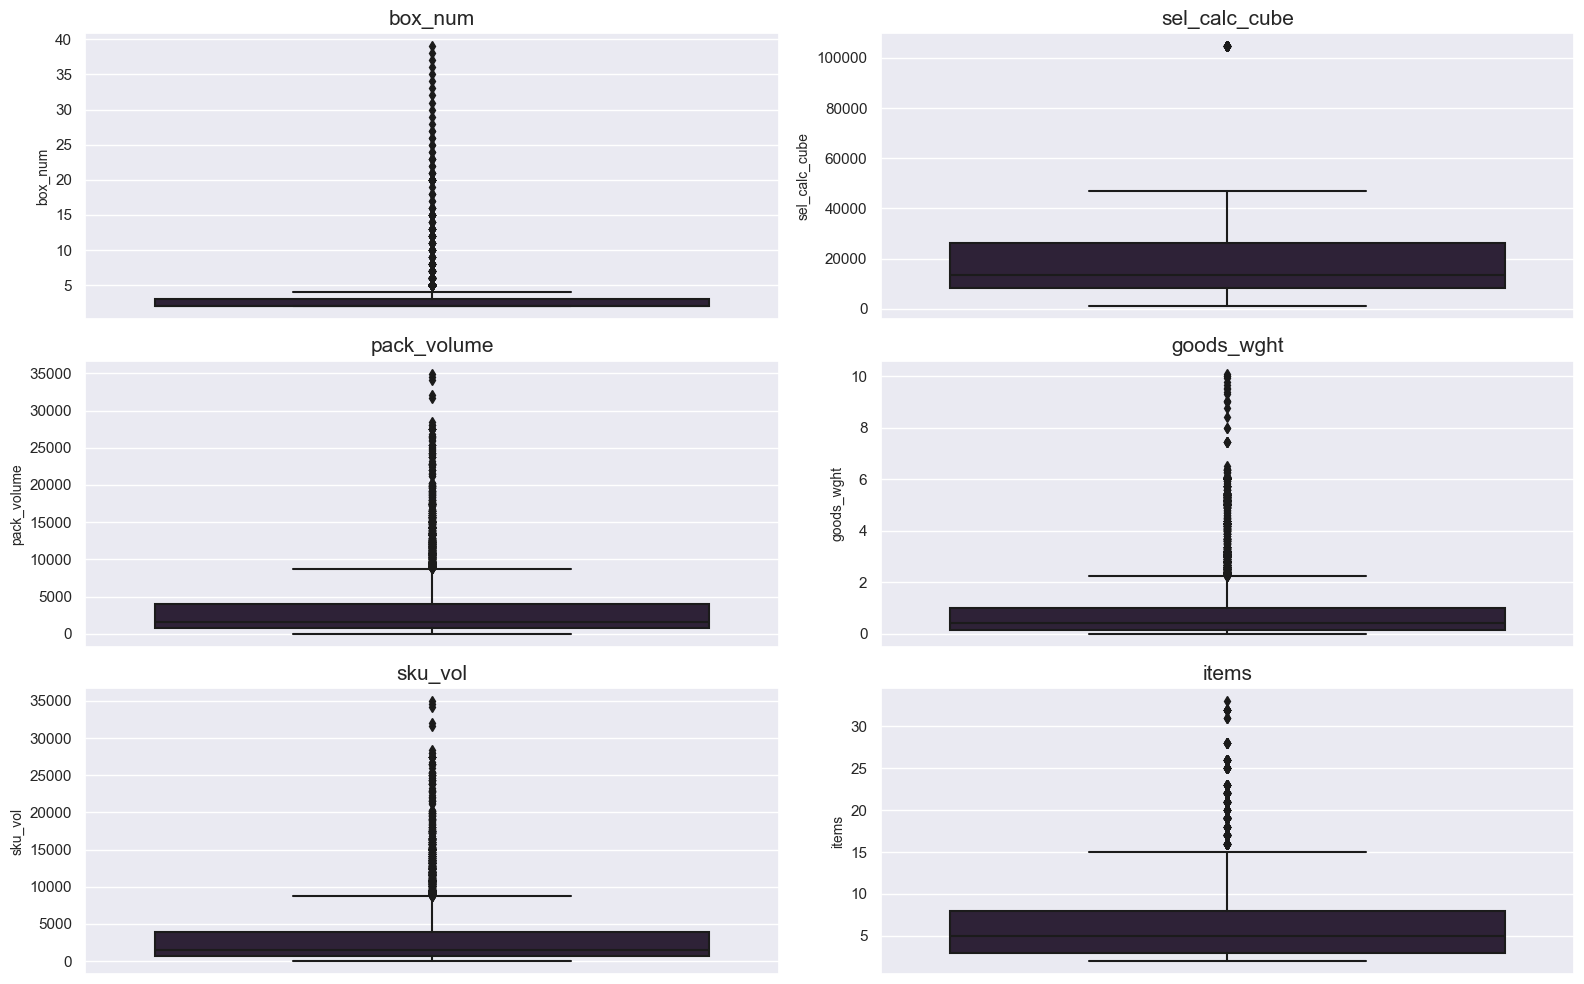

In [205]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))  

axs = axs.ravel()

for i in range(6):
    sns.boxplot(y=tt[df_numeric.columns[i]], ax=axs[i])  
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

In [206]:
tt

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_vol,items
83,0f489755c658e890bfd405327298525d,2,YMW,MYE,26277,14703,0.300,d0c68322e37b29e48acd9b0da80b1ac4,14703.0,2
512,51e3d7711adf5ca219ae68f593dafede,2,MYC,MYC,8436,1574,0.617,dfb41d7d999b5ff0623f7782e2edb6e0,1574.0,2
544,ab9f9deb5804ac0dc24a670132449fd4,2,MYA,MYB,3449,63,0.039,13dc4ae5a4e0cca6a950de71ef91a367,63.0,2
604,ebc34a27fb50478533999824105744e7,2,MYB,MYB,3449,832,0.112,e979a16bf283ff452220a7baae40b631,832.0,3
609,ebc34a27fb50478533999824105744e7,2,MYB,MYB,3449,408,0.200,487768eb5dc0f0032d65d55157d72a6c,408.0,3
...,...,...,...,...,...,...,...,...,...,...
224184,379f923b506613b3bd8d3f1bf1cc7092,2,YMW,YMW,21812,6930,0.830,5664a2fd1b12053b79db294eb5c064e6,6930.0,5
224186,379f923b506613b3bd8d3f1bf1cc7092,2,YMW,YMW,21812,848,0.400,87f83e6bcf35b932ce4e25d18c73ea61,848.0,5
224191,230554e13531b40ccd09528b875f4cc4,2,YML,YMF,13500,4395,0.101,8e9886522b541ce678c9b5093f024f1c,4395.0,3
224192,230554e13531b40ccd09528b875f4cc4,2,YML,YMF,13500,1500,0.260,a5eab088f3c05250f66b6abb906a8d89,1500.0,3


In [207]:
for i in sku_cargotypes[sku_cargotypes['sku'] == '0003da69535758c817b78b64da05aae0']['cargotype']:
    print(cargotype_info[cargotype_info['cargotype']==i]['description'].values[0])

Склад МГТ (малогабаритный товар)
хрупкое
не требует упаковки
продукты питания


In [208]:
df = df[df['selected_carton']!='YMB']

# Модель

In [209]:
packs_in_order = df.groupby('orderkey')['selected_carton'].count().reset_index()

packs_in_order.columns = ['orderkey', 'carton_types']

In [210]:
to_test = pd.merge(df, packs_in_order, on='orderkey', how='left')

In [211]:
to_test = to_test.drop('orderkey', axis=1)

to_test.duplicated().sum()

44587

In [212]:
to_test = to_test.drop_duplicates()

In [213]:
to_test.shape

(179735, 10)

In [214]:
(to_test['items'] == to_test['carton_types']).value_counts()

True     178407
False      1328
dtype: int64

In [227]:
df['recommended_cartontype'].value_counts()

YMA        39308
YMC        27043
MYC        25029
YMF        17938
MYA        14903
YMG        14169
NONPACK    13056
MYF        11893
MYB        11732
YMW        10462
YML         9175
YME         8611
MYD         7177
MYE         4459
YMX         3644
STRETCH     1589
YMB         1397
YMU          953
YMT          640
YMI          434
YMP          378
YMV          332
Name: recommended_cartontype, dtype: int64

In [215]:
df['selected_carton'].value_counts()

MYB        46536
MYC        38427
NONPACK    19901
MYD        18740
MYA        16680
YMC        16163
YMG        11488
YMF        10708
STRETCH    10564
YMA        10330
YMW        10300
MYE         6955
YME         5375
MYF          959
YML          850
YMX          346
Name: selected_carton, dtype: int64

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error as mse

In [217]:
df

,orderkey,box_num,recommended_cartontype,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_vol,items
0,d48f3211c1ffccdc374f23139a9ab668,1,YML,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,2046.0,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,MYD,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,3050.0,1
2,3e646181f6f708edd3326c1626c12d23,1,YMG,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,15180.0,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,MYE,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,6561.0,1
4,097917e584151c0c21f205b2c3aafa10,1,YMF,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,6346.0,1
...,...,...,...,...,...,...,...,...,...,...
224318,8ed0af8473526c54b4b2f99f0060c3ea,1,YML,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,25168.0,1
224319,0e4f34db53e37d6bf171c2e055e2b4e0,1,YMC,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,2080.0,1
224320,e71d2e750ce9a7a39c273c634be1665d,1,YMC,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,3523.0,1
224321,2e2a642f611b5a6f2c404ab945fbc2a3,1,YMU,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,552.0,1


In [218]:
X = df[['box_num', 'pack_volume', 'goods_wght', 'sku_vol', 'items']]
y = df['sel_calc_cube']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [220]:
pipe = Pipeline([('scaler', StandardScaler()), ("LR", LinearRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [221]:
preds = pipe.predict(X_test)

In [223]:
print(f'TRAIN: {mse(y_train, pipe.predict(X_train), squared=False)}')
print(f'TEST: {mse(y_test, preds, squared=False)}')

TRAIN: 10744.376075029464
TEST: 10779.02865692408
